# Ant Colony Optimization (Ant System)

In [1]:
from ACO import *
import matplotlib.pyplot as plt

In [2]:
#Inicialización instancia TSP desde archivo de texto

graph = []
points = []
with open('a100.txt') as f:
    for line in f.readlines():
        city = line.split(' ')
        graph.append([int(city[0]) - 1, float(city[1]), float(city[2])])
        points.append([city[1], city[2]])

In [3]:
opt_path, opt_dist = ACO(graph, ants = 100, iterations = 20, alpha = 1.0, beta = 10.0, rho = 0.5, Q = 1.0)

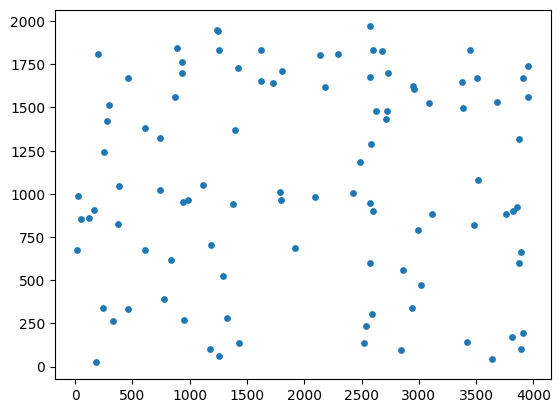

In [4]:
X, Y = [], []
for i in graph:
    X.append(i[1])
    Y.append(i[2])
plt.scatter(X, Y, marker='o', s=15)

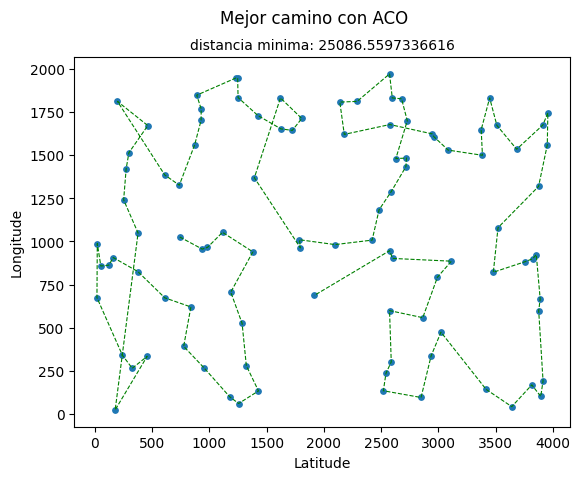

In [84]:
X_path, Y_path = [], []
for i in opt_path:
    X_path.append(graph[i][1])
    Y_path.append(graph[i][2])
    
plt.scatter(X, Y, marker='o', s=15)
plt.plot(X_path, Y_path, c='g', linewidth=0.8, linestyle="--")

# Plot properties
plt.suptitle('Mejor camino con ACO')
plt.title('distancia minima: {}'.format(opt_dist), fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Show plot
plt.show()
plt.close()

# Simulated Annealing

In [6]:
from SA import *

In [87]:
cost_matrix = []
for i in range(len(graph)):
    row = []
    for j in range(len(graph)):
        row.append(dist(graph[i], graph[j]))
    cost_matrix.append(row)

In [88]:
n = list(range(100000))
sigma = list(range(len(graph)))
P = sigma
f = lambda n,C : n^4
for i in n:

    P = Markov(P, i, cost_matrix, bn = f)

distancia = sum([cost_matrix[P[i]][P[i - 1]] for i in range(1, len(P))]) + cost_matrix[P[len(P) - 1]][P[0]]


/root/work/SA.py:35: RuntimeWarning: overflow encountered in exp
  crit = np.exp(-beta*(omega(tau,D)-omega(Xn,D)))


Text(0, 0.5, 'Longitude')

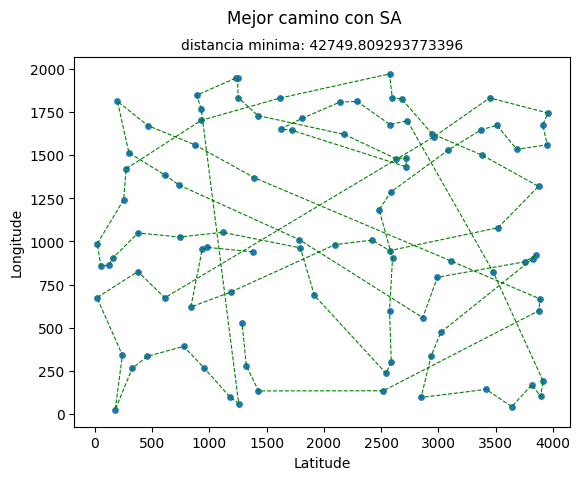

In [90]:
X_path, Y_path = [], []
for i in P:
    X_path.append(graph[i][1])
    Y_path.append(graph[i][2])

plt.scatter(X, Y, marker='o', s=15)
plt.plot(X_path, Y_path, c='g', linewidth=0.8, linestyle="--")

# propiedades plot
plt.suptitle('Mejor camino con SA')
plt.title('distancia minima: {}'.format(distancia), fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')


# Análisis de parámetros

In [ ]:
graph_analisis = []
points_analisis = []
with open('a30.txt') as f:
    for line in f.readlines():
        city = line.split(' ')
        graph_analisis.append([int(city[0]) - 1, float(city[1]), float(city[2])])
        points.append([city[1], city[2]])

In [33]:
test_distances = []
for i in range(10):
    beta_test = 1.0 * i
    suma = 0 
    for j in range(1):
        opt_path, opt_dist = ACO(graph, ants = 30, iterations = 20, alpha = 1.0, beta = beta_test, rho = 0.5, Q = 1.0)
        suma += opt_dist
    test_distances.append(suma)

Text(0, 0.5, 'distancia optima')

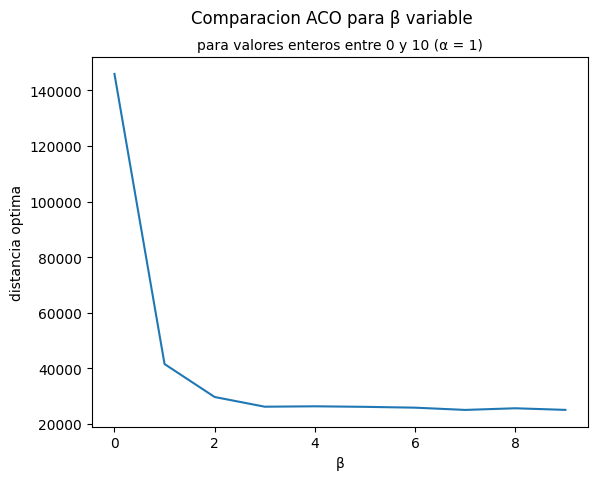

In [34]:
plt.plot(list(range(10)), test_distances)

plt.suptitle('Comparacion ACO para β variable')
plt.title('para valores enteros entre 0 y 10 (α = 1)', fontsize = 10)
plt.xlabel('β')
plt.ylabel('distancia optima')

In [31]:
test_distances_alpha = []
for i in range(11):
    alpha_test = 1.0 * i
    suma = 0 
    for j in range(5):
        opt_path, opt_dist = ACO(graph, ants = 30, iterations = 20, alpha = alpha_test, beta = 5.0, rho = 0.5, Q = 1.0)
        suma += opt_dist
    test_distances_alpha.append(suma / 5)

Text(0, 0.5, 'distancia optima')

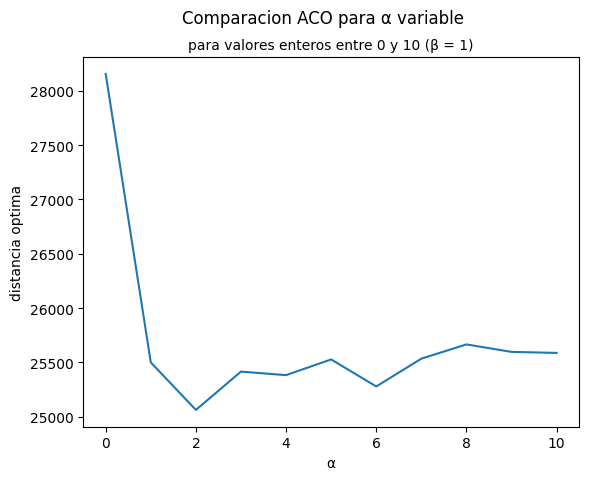

In [32]:
plt.plot(list(range(11)), test_distances_alpha)

plt.suptitle('Comparacion ACO para α variable')
plt.title('para valores enteros entre 0 y 10 (β = 1)', fontsize = 10)
plt.xlabel('α')
plt.ylabel('distancia optima')

# Comparación entre algoritmos

## Instancia de 30 ciudades:

In [37]:
import time

In [40]:
graph_vs_1 = []
points_analisis = []
with open('a30.txt') as f:
    for line in f.readlines():
        city = line.split(' ')
        graph_vs_1.append([int(city[0]) - 1, float(city[1]), float(city[2])])
        points.append([city[1], city[2]])

X_vs_1, Y_vs_1 = [], []
for i in graph_vs_1:
    X_vs_1.append(i[1])
    Y_vs_1.append(i[2])

In [67]:
# ACO

start_time_ACO_1 = time.time()

opt_path_vs_1, opt_dist_vs_1 = ACO(graph_vs_1, ants = 100, iterations = 20, alpha = 1.0, beta = 10.0, rho = 0.5, Q = 1.0)

end_time_ACO_1 = time.time()

ACO_time_1 = end_time_ACO_1 - start_time_ACO_1

#Simulated Annealing

cost_matrix = []
for i in range(len(graph_vs_1)):
    row = []
    for j in range(len(graph_vs_1)):
        row.append(dist(graph_vs_1[i], graph_vs_1[j]))
    cost_matrix.append(row)

start_time_SA_1 = time.time()

n = list(range(100000))

sigma = list(range(len(graph_vs_1)))
P_vs_1 = sigma

f = lambda n,C : n^4
for i in n:

    P_vs_1 = Markov(P_vs_1, i, cost_matrix, bn = f)


distancia_vs_1 = sum([cost_matrix[P_vs_1[i]][P_vs_1[i - 1]] for i in range(1, len(P_vs_1))]) + cost_matrix[P_vs_1[len(P_vs_1) - 1]][P_vs_1[0]]

end_time_SA_1 = time.time()
SA_time_1 = end_time_SA_1 - start_time_SA_1

/root/work/SA.py:35: RuntimeWarning: overflow encountered in exp
  crit = np.exp(-beta*(omega(tau,D)-omega(Xn,D)))


Text(0.05, 0.95, 't = 3.601560354232788')

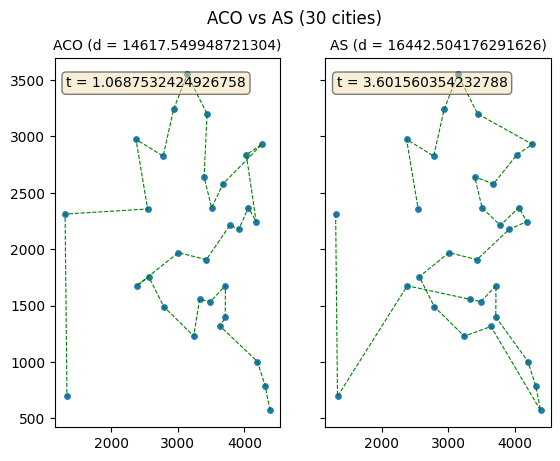

In [92]:
X_path_ACO_vs_1, Y_path_ACO_vs_1 = [], []
for i in opt_path_vs_1:
    X_path_ACO_vs_1.append(graph_vs_1[i][1])
    Y_path_ACO_vs_1.append(graph_vs_1[i][2])
    
X_path_AS_vs_1, Y_path_AS_vs_1 = [], []
for i in P_vs_1:
    X_path_AS_vs_1.append(graph_vs_1[i][1])
    Y_path_AS_vs_1.append(graph_vs_1[i][2])

fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row')
fig.suptitle('ACO vs AS (30 cities)')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax1.scatter(X_vs_1, Y_vs_1, marker='o', s=15)
ax1.plot(X_path_ACO_vs_1, Y_path_ACO_vs_1, c='g', linewidth=0.8, linestyle="--")
ax1.set_title('ACO (d = {})'.format(opt_dist_vs_1), fontsize=10)
ax1.text(0.05, 0.95, 't = {}'.format(ACO_time_1), transform=ax1.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ax2.scatter(X_vs_1, Y_vs_1, marker='o', s=15)
ax2.plot(X_path_AS_vs_1, Y_path_AS_vs_1, c='g', linewidth=0.8, linestyle="--") 
ax2.set_title('AS (d = {})'.format(distancia_vs_1), fontsize=10)
ax2.text(0.05, 0.95, 't = {}'.format(SA_time_1), transform=ax2.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

## Instancia 50 ciudades

In [66]:
graph_vs_2 = []
points_analisis = []
with open('a50.txt') as f:
    for line in f.readlines():
        city = line.split(' ')
        graph_vs_2.append([int(city[0]) - 1, float(city[1]), float(city[2])])
        points.append([city[1], city[2]])

X_vs_2, Y_vs_2 = [], []
for i in graph_vs_2:
    X_vs_2.append(i[1])
    Y_vs_2.append(i[2])

In [70]:
# ACO

start_time_ACO_2 = time.time()

opt_path_vs_2, opt_dist_vs_2 = ACO(graph_vs_2, ants = 100, iterations = 20, alpha = 1.0, beta = 10.0, rho = 0.5, Q = 1.0)

end_time_ACO_2 = time.time()

ACO_time_2 = end_time_ACO_2 - start_time_ACO_2

#Simulated Annealing

cost_matrix = []
for i in range(len(graph_vs_2)):
    row = []
    for j in range(len(graph_vs_2)):
        row.append(dist(graph_vs_2[i], graph_vs_2[j]))
    cost_matrix.append(row)

start_time_SA_2 = time.time()

n = list(range(100000))

sigma = list(range(len(graph_vs_2)))
P_vs_2 = sigma

f = lambda n,C : n^4
for i in n:

    P_vs_2 = Markov(P_vs_2, i, cost_matrix, bn = f)


distancia_vs_2 = sum([cost_matrix[P_vs_2[i]][P_vs_2[i - 1]] for i in range(1, len(P_vs_2))]) + cost_matrix[P_vs_2[len(P_vs_2) - 1]][P_vs_2[0]]

end_time_SA_2 = time.time()
SA_time_2 = end_time_SA_2 - start_time_SA_2

/root/work/SA.py:35: RuntimeWarning: overflow encountered in exp
  crit = np.exp(-beta*(omega(tau,D)-omega(Xn,D)))


Text(0.05, 0.95, 't = 4.503303050994873')

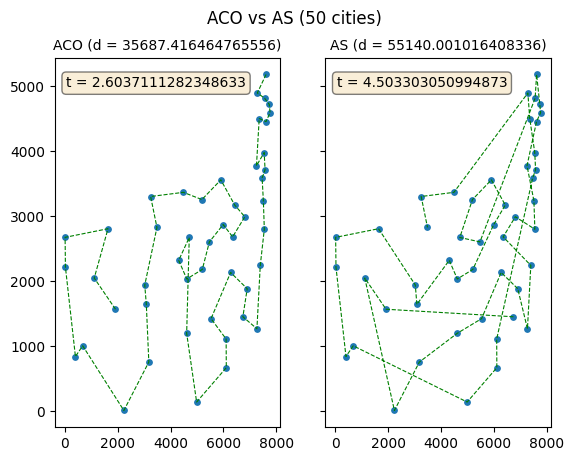

In [93]:
X_path_ACO_vs_2, Y_path_ACO_vs_2 = [], []
for i in opt_path_vs_2:
    X_path_ACO_vs_2.append(graph_vs_2[i][1])
    Y_path_ACO_vs_2.append(graph_vs_2[i][2])
    
X_path_AS_vs_2, Y_path_AS_vs_2 = [], []
for i in P_vs_2:
    X_path_AS_vs_2.append(graph_vs_2[i][1])
    Y_path_AS_vs_2.append(graph_vs_2[i][2])

fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row')
fig.suptitle('ACO vs AS (50 cities)')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax1.scatter(X_vs_2, Y_vs_2, marker='o', s=15)
ax1.plot(X_path_ACO_vs_2, Y_path_ACO_vs_2, c='g', linewidth=0.8, linestyle="--")
ax1.set_title('ACO (d = {})'.format(opt_dist_vs_2), fontsize=10)
ax1.text(0.05, 0.95, 't = {}'.format(ACO_time_2), transform=ax1.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ax2.scatter(X_vs_2, Y_vs_2, marker='o', s=15)
ax2.plot(X_path_AS_vs_2, Y_path_AS_vs_2, c='g', linewidth=0.8, linestyle="--") 
ax2.set_title('AS (d = {})'.format(distancia_vs_2), fontsize=10)
ax2.text(0.05, 0.95, 't = {}'.format(SA_time_2), transform=ax2.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

## Instancia 100 ciudades

In [76]:
graph_vs_3 = []
points_analisis = []
with open('a100.txt') as f:
    for line in f.readlines():
        city = line.split(' ')
        graph_vs_3.append([int(city[0]) - 1, float(city[1]), float(city[2])])
        points.append([city[1], city[2]])

X_vs_3, Y_vs_3 = [], []
for i in graph_vs_3:
    X_vs_3.append(i[1])
    Y_vs_3.append(i[2])

In [77]:
# ACO

start_time_ACO_3 = time.time()

opt_path_vs_3, opt_dist_vs_3 = ACO(graph_vs_3, ants = 100, iterations = 20, alpha = 1.0, beta = 10.0, rho = 0.5, Q = 1.0)

end_time_ACO_3 = time.time()

ACO_time_3 = end_time_ACO_3 - start_time_ACO_3

#Simulated Annealing

cost_matrix = []
for i in range(len(graph_vs_3)):
    row = []
    for j in range(len(graph_vs_3)):
        row.append(dist(graph_vs_3[i], graph_vs_3[j]))
    cost_matrix.append(row)

start_time_SA_3 = time.time()

n = list(range(100000))

sigma = list(range(len(graph_vs_3)))
P_vs_3 = sigma

f = lambda n,C : n^4
for i in n:

    P_vs_3 = Markov(P_vs_3, i, cost_matrix, bn = f)


distancia_vs_3 = sum([cost_matrix[P_vs_3[i]][P_vs_3[i - 1]] for i in range(1, len(P_vs_3))]) + cost_matrix[P_vs_3[len(P_vs_3) - 1]][P_vs_3[0]]

end_time_SA_3 = time.time()
SA_time_3 = end_time_SA_3 - start_time_SA_3

/root/work/SA.py:35: RuntimeWarning: overflow encountered in exp
  crit = np.exp(-beta*(omega(tau,D)-omega(Xn,D)))


Text(0.05, 0.95, 't = 8.074395179748535')

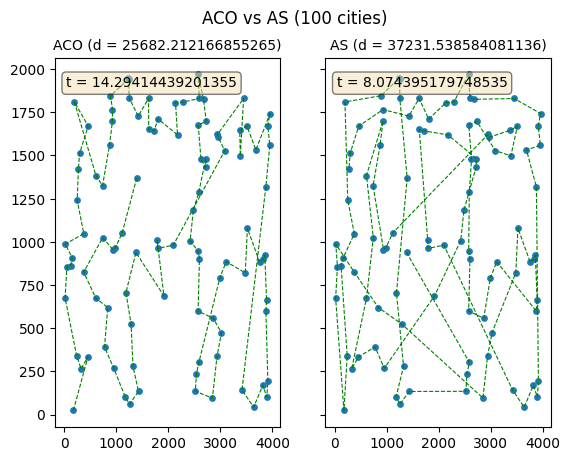

In [94]:
X_path_ACO_vs_3, Y_path_ACO_vs_3 = [], []
for i in opt_path_vs_3:
    X_path_ACO_vs_3.append(graph_vs_3[i][1])
    Y_path_ACO_vs_3.append(graph_vs_3[i][2])
    
X_path_AS_vs_3, Y_path_AS_vs_3 = [], []
for i in P_vs_3:
    X_path_AS_vs_3.append(graph_vs_3[i][1])
    Y_path_AS_vs_3.append(graph_vs_3[i][2])

fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row')
fig.suptitle('ACO vs AS (100 cities)')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax1.scatter(X_vs_3, Y_vs_3, marker='o', s=15)
ax1.plot(X_path_ACO_vs_3, Y_path_ACO_vs_3, c='g', linewidth=0.8, linestyle="--")
ax1.set_title('ACO (d = {})'.format(opt_dist_vs_3), fontsize=10)
ax1.text(0.05, 0.95, 't = {}'.format(ACO_time_3), transform=ax1.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ax2.scatter(X_vs_3, Y_vs_3, marker='o', s=15)
ax2.plot(X_path_AS_vs_3, Y_path_AS_vs_3, c='g', linewidth=0.8, linestyle="--") 
ax2.set_title('AS (d = {})'.format(distancia_vs_3), fontsize=10)
ax2.text(0.05, 0.95, 't = {}'.format(SA_time_3), transform=ax2.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=73f4cb79-c54a-4638-9be1-ae6a747cab6b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>